# <div style="text-align: center; color: black;"> 机器学习小组大作业 </div>

· 合肥工业大学宣城校区 计算机科学与技术22-4班 第1小组<br><br>
· 说明：我们选取了kaggle平台上有关蘑菇是否可以食用的数据集，该数据集共有五万多条数据。以下是我们会经历的主要步骤<br>
  一、数据集处理<br>
  1、观察数据集<br>
  .<br>
  .<br>
  .<br>
  后面再补充<br>
对该数据集进行分类并可视化。<br>
数据集网址：https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data

# 设置

首先，导入一些常用模块并测试一下这个notebook在配置的conda环境中是否可以正常工作。

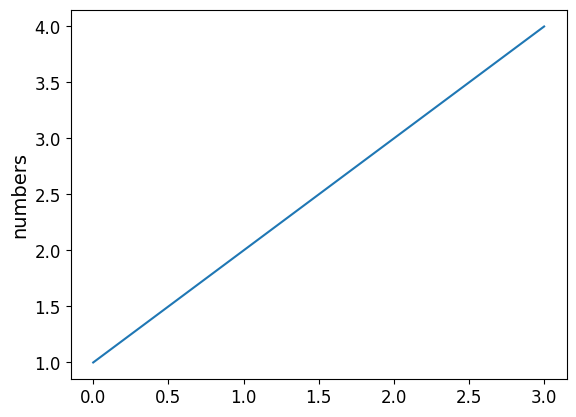

测试代码运行正常！


In [9]:
# 导入必要的库
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
import tensorflow
import torch
import warnings

# 设置随机种子以保证结果的一致性
np.random.seed(42)

# 设置matplotlib的参数以保证图形的一致性
matplotlib.rc('axes', labelsize=14)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

# 忽略无用的警告
warnings.filterwarnings(action="ignore", message="^internal gelsd")
plt.plot([1, 2, 3, 4])
plt.ylabel('numbers')
plt.show()

print("测试代码运行正常！")

## 第一部分：数据集处理

以下内容先对 https://www.kaggle.com/code/ajeetsingh123/mushroom-classification-acc-99-multiple-algos 进行复现，后续改动不影响后面的代码。

### 1、读取数据集

In [10]:
# 设置matplotlib字体，让matplotlib可以显示中文
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

通过pandas读入数据集

In [11]:
data = pd.read_csv(r'./mushroom_cleaned.csv')
df = pd.DataFrame(data)
df.head()
print("数据集正常读入")

数据集正常读入


### 2、对数据集进行分析

<font size="4">（1）通过info（）方法获取数据集的简单描述。如总行数，每个属性的类型和非空值的数量。</font>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


通过df.info()输出可知，该数据共有54035行、9列数据。同时，每一列的非空数据量都为54035，等于总行数，表明这个数据集没有空缺数据。

<font size="4">（2）通过describe()方法查看数据集的属性摘要</font>

In [13]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


<font size="4">（3）根据kaggle上的数据集介绍信息，统计并对比可食用蘑菇和不可食用蘑菇数据量</font>

![图1 kaggle网站上作者对数据集的介绍](images/img1.png)
通过网站中数据集作者对数据集的介绍可知，“class”表示蘑菇是否可食用。

下面对可食用和不可食用的蘑菇数据量进行统计分析，看看二者数据量是否相差过大，如果相差过大则需要对过多一方的数据进行适当删除，避免因数据不平衡导致模型预测时有偏向。

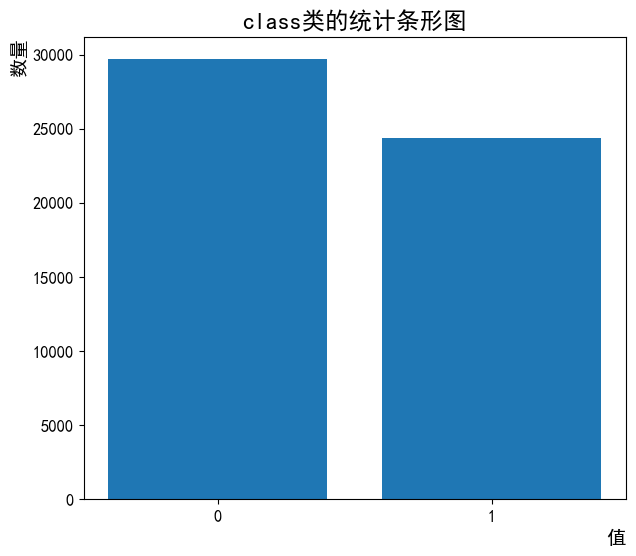

In [21]:
fig, ax = plt.subplots(figsize=(7, 6))

x = [0,1]
y_T = df['class'].value_counts()
y = [y_T[1],y_T[0]]
ax.bar(x, y)

ax.set_xticks(x)
ax.set_xticklabels(x)

ax.set_xlabel("值", loc='right', color='black', fontsize=14)
ax.set_ylabel("数量", loc='top', color='black', fontsize=14)
ax.set_title("class类的统计条形图", fontsize=17)

plt.show()

通过条形计数图可以看出，可食用蘑菇和不可食用蘑菇数据量相差不大，数据集较为平衡，不需要对数据集进行删减处理。

<font size='4'>(4)通过直方图对数据特征的分布情况进行了解</font>

In [24]:
# df.hist(bins=50)
# plt.suptitle("各特征的分布情况", fontsize=17)
# plt.tight_layout()

我们也可以使用seaborn绘制直方图。保持kde=True以绘制密度和直方图

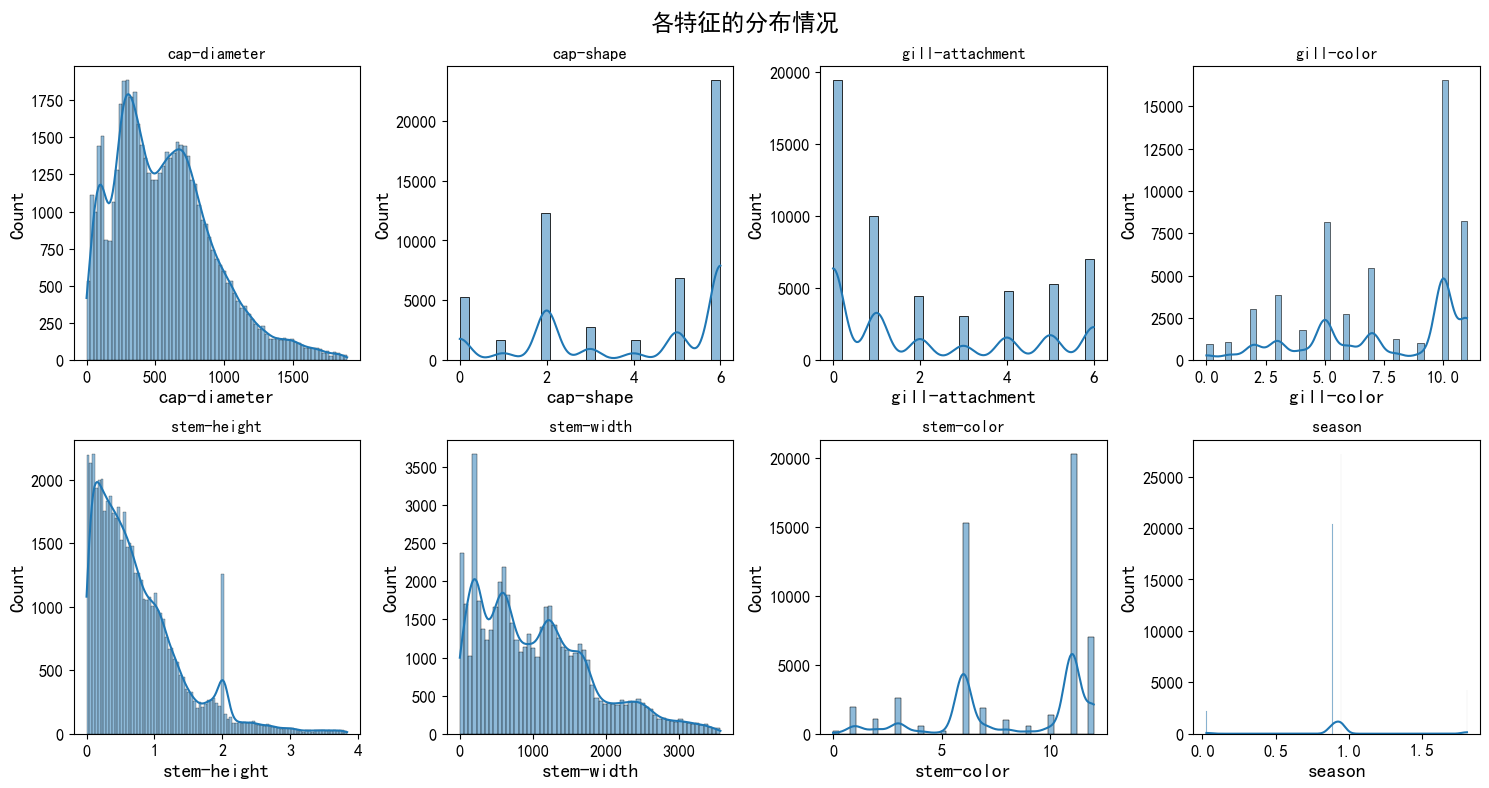

In [23]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, ax=axs[i], kde=True)  
    axs[i].set_title(column)  

plt.suptitle("各特征的分布情况", fontsize=17)
plt.tight_layout()  
plt.show() 

绘制箱型图识别异常值和检测数据偏差

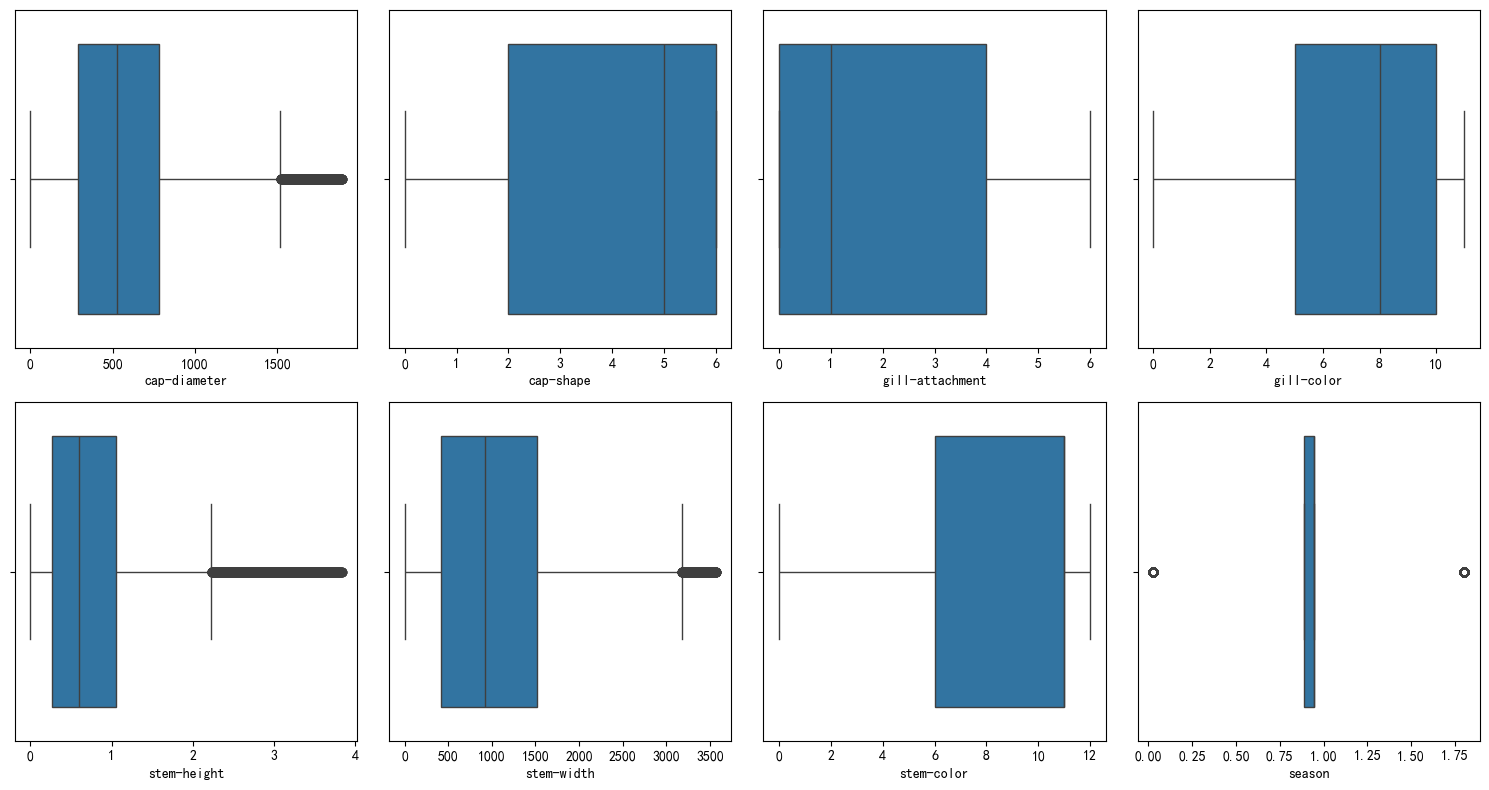

In [9]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axs[i])  

plt.tight_layout()  
plt.show() 

删除偏离平均值超过3个标准偏差的数据点。

绘制相关矩阵

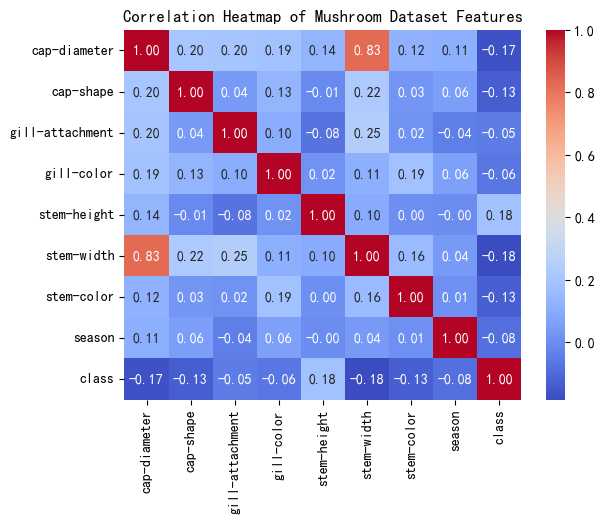

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Mushroom Dataset Features')
plt.show()

In [11]:
corr_matrix["class"].sort_values(ascending=False)

class              1.000000
stem-height        0.183354
gill-attachment   -0.052541
gill-color        -0.063947
season            -0.082919
stem-color        -0.128339
cap-shape         -0.133338
cap-diameter      -0.165676
stem-width        -0.182856
Name: class, dtype: float64

### 3、将数据集划分为训练集、测试集和验证集

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 定义数据和标签
x = df.drop(columns=['class'])
y = df['class']

# 创建标准化对象
std = StandardScaler()

# 首先将数据集划分为训练集和其余部分（测试集和验证集）
x_train, x_other, y_train, y_other = train_test_split(x, y, test_size=0.4, stratify=y, random_state=42)

# 然后将其余部分划分为测试集和验证集
x_test, x_val, y_test, y_val = train_test_split(x_other, y_other, test_size=0.5, stratify=y_other, random_state=42)

# 对数据进行标准化处理
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
x_val = std.transform(x_val)

## 第二部分：模型训练

### 1、吴在彤

### 2、张驰

### 3、吴硕

### 4、胡浩鸿

### 5、苏昱铭

### 6、祁子涵